# Download RGI glacier shapefiles and plot those that are in our RoI

In [1]:
data_dir = "rgi_data"

In [2]:
!mkdir -p $data_dir
%cd $data_dir
!wget -O 02_rgi60_WesternCanadaUS.zip https://www.glims.org/RGI/rgi60_files/02_rgi60_WesternCanadaUS.zip
!unzip 02_rgi60_WesternCanadaUS.zip
%cd ..

/home/jovyan/sar-eric-seth/rainier_analysis/rgi_data
--2021-03-15 23:28:13--  https://www.glims.org/RGI/rgi60_files/02_rgi60_WesternCanadaUS.zip
Resolving www.glims.org (www.glims.org)... 128.138.135.43
Connecting to www.glims.org (www.glims.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20937343 (20M) [application/zip]
Saving to: ‘02_rgi60_WesternCanadaUS.zip’

02_rgi60_WesternCan 100%[===================>]  19.97M  41.8MB/s    in 0.5s    

2021-03-15 23:28:13 (41.8 MB/s) - ‘02_rgi60_WesternCanadaUS.zip’ saved [20937343/20937343]

Archive:  02_rgi60_WesternCanadaUS.zip
  inflating: 02_rgi60_WesternCanadaUS.dbf  
  inflating: 02_rgi60_WesternCanadaUS.prj  
  inflating: 02_rgi60_WesternCanadaUS.shp  
  inflating: 02_rgi60_WesternCanadaUS.shx  
  inflating: 02_rgi60_WesternCanadaUS_hypso.csv  
/home/jovyan/sar-eric-seth/rainier_analysis


In [3]:
import geopandas as gpd

In [4]:
# rgi60_gdf = gpd.read_file("shapefiles/02_rgi60_WesternCanadaUS.shp")
rgi60_gdf = gpd.read_file(f"{data_dir}/02_rgi60_WesternCanadaUS.shp")
rainier_box = gpd.read_file('mt_rainier.geojson')

<AxesSubplot:>

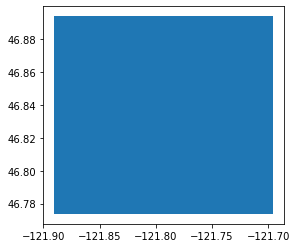

In [5]:
rainier_box.plot()

In [6]:
rainier_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
rgi60_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

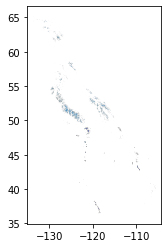

In [8]:
rgi60_gdf.plot()

In [9]:
# wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.within(rainier_box)].copy()
wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.intersects(rainier_box.loc[0, 'geometry'])]

<AxesSubplot:>

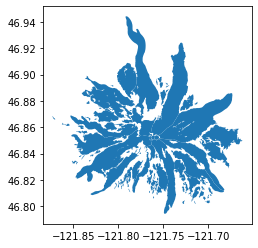

In [10]:
wa_rgi60_gdf.plot()

In [11]:
wa_rgi60_gdf

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
14255,RGI60-02.14256,G238227E46901N,19709999,19949999,-121.77327,46.90137,2,4,8.004,1085,...,354,9168,0,0,0,0,0,9,Carbon Glacier WA,"POLYGON ((-121.79189 46.94312, -121.79201 46.9..."
14258,RGI60-02.14259,G238261E46885N,19709999,19949999,-121.73878,46.88511,2,4,9.195,1437,...,21,8445,0,0,0,0,0,9,Winthrop Glacier WA,"POLYGON ((-121.73286 46.87035, -121.73377 46.8..."
14276,RGI60-02.14277,G238210E46896N,19709999,19949999,-121.78988,46.89649,2,4,3.029,1992,...,27,2196,0,0,0,0,0,9,Russell Glacier WA,"POLYGON ((-121.78094 46.90121, -121.78078 46.9..."
14289,RGI60-02.14290,G238247E46894N,19709999,19949999,-121.75309,46.89425,2,4,0.188,2118,...,14,455,0,0,0,0,0,9,WA,"POLYGON ((-121.75121 46.89406, -121.75118 46.8..."
14290,RGI60-02.14291,G238243E46894N,19709999,19949999,-121.75730,46.89416,2,4,0.033,2219,...,358,510,0,0,0,0,0,9,WA,"POLYGON ((-121.75773 46.89675, -121.75762 46.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14404,RGI60-02.14405,G238285E46803N,19709999,19949999,-121.71517,46.80289,2,4,0.011,1917,...,110,224,0,0,0,0,0,9,WA,"POLYGON ((-121.71470 46.80206, -121.71480 46.8..."
14407,RGI60-02.14408,G238128E46867N,19709999,-9999999,-121.87169,46.86686,2,4,0.019,1899,...,318,301,0,0,0,0,0,9,WA,"POLYGON ((-121.87317 46.86822, -121.87307 46.8..."
18816,RGI60-02.18817,G238285E46833N,19709999,19949999,-121.71492,46.83292,2,4,3.567,1617,...,113,5602,0,0,0,0,0,9,Cowlitz Glacier WA,"POLYGON ((-121.70470 46.82827, -121.70367 46.8..."
18817,RGI60-02.18818,G238252E46825N,19709999,19949999,-121.74768,46.82481,2,4,1.551,2081,...,140,2046,0,0,0,0,0,9,Wilson Glacier WA,"POLYGON ((-121.75743 46.82628, -121.75693 46.8..."


In [13]:
named_glaciers = wa_rgi60_gdf[wa_rgi60_gdf['Name'] != 'WA']

In [14]:
named_glaciers.columns

Index(['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope',
       'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging',
       'Linkages', 'Name', 'geometry'],
      dtype='object')

In [15]:
named_glaciers.to_file("rgi_data/rainier_glaciers.geojson", driver='GeoJSON')

In [ ]:
named_glaciers[named_glaciers['Name'] == 'Carbon Glacier WA']

In [ ]:
south_facing_glaciers = named_glaciers[(named_glaciers['Aspect'] > 90) & (named_glaciers['Aspect'] < 270)]
south_facing_glaciers.plot()

In [ ]:
rainier_box.columns

In [ ]:
rgi60_gdf.columns

In [ ]:
wa_rgi60_gdf[wa_rgi60_gdf['Name'] == 'Kautz Glacier WA'].plot()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
glacier = wa_rgi60_gdf.iloc[[0]]
glacier['Name'].item()

## Plot all named glaciers so we can see their shapes in detail

In [ ]:
for i in range(len(named_glaciers)):
    glacier = named_glaciers.iloc[[i]]
    glacier.plot()
    title = glacier['Name'].item()
    plt.title(title)

In [ ]:
sorted(named_glaciers['Name'])

In [ ]:
sorted(set(named_glaciers['Name'])) # Excluding "WA"